In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the dataset into a DataFrame
# Adjust the path accordingly if the dataset is in a different directory
file_path = r'C:\Users\USER\Desktop\IMDBDataset.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Explore the structure of the dataset
print(df.info())

# Explore a few rows to understand the content
print(df.head())

# Preprocessing: handle missing values, remove unnecessary columns
df = df.dropna()  
df = df[['review', 'sentiment']] 

# Explore the distribution of sentiments
print(df['sentiment'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [10]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
# Import TextBlob
from textblob import TextBlob

# Apply sentiment analysis using TextBlob
df['sentiment_score'] = df['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Convert sentiment scores to labels
df['predicted_sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Display the updated DataFrame
print(df.head())

# Evaluate the accuracy
accuracy = (df['sentiment'] == df['predicted_sentiment']).mean()
print(f"Accuracy: {accuracy * 100:.2f}%")

                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

   sentiment_score predicted_sentiment  
0         0.023433            positive  
1         0.109722            positive  
2         0.354008            positive  
3        -0.057813            negative  
4         0.217952            positive  
Accuracy: 68.82%


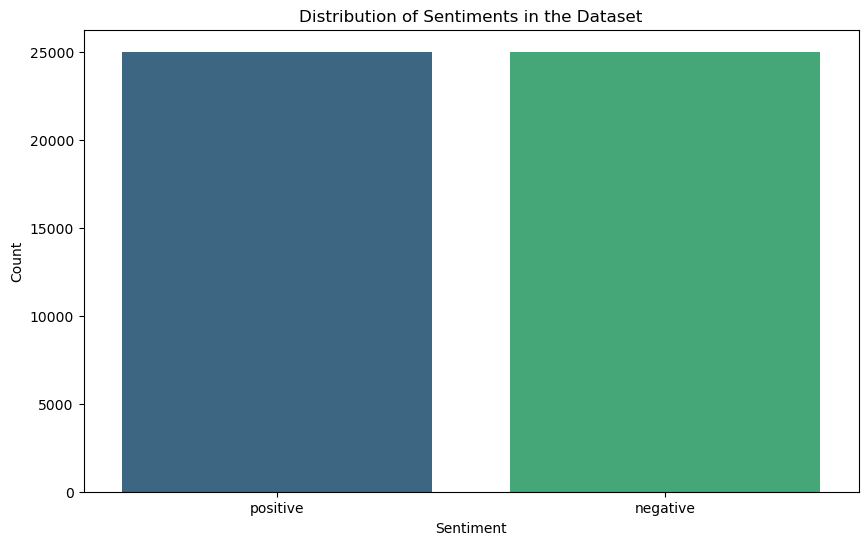

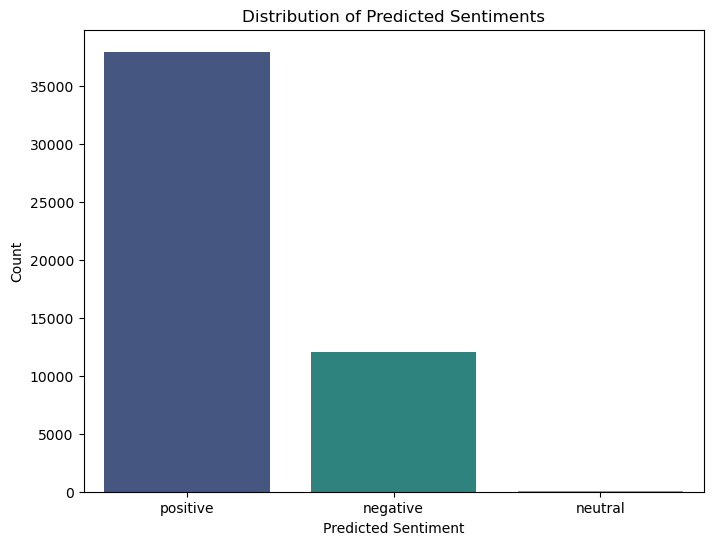

In [19]:
'%matplotlib inline'
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of sentiments in the dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments in the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualize the predicted sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='predicted_sentiment', data=df, palette='viridis')
plt.title('Distribution of Predicted Sentiments')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Count')
plt.show()


**Title:** Sentiment Analysis on Movie Reviews

Data Acquisition:

For this project, I chose to analyze sentiments in movie reviews. I obtained a dataset from Kaggle containing 50,000 movie reviews labeled as positive or negative. The dataset provided a diverse range of reviews, making it suitable for sentiment analysis.

Data Processing and Cleaning:

Upon loading the dataset into a Pandas DataFrame, I explored its structure and conducted initial data cleaning. I handled missing values and selected relevant columns, focusing on the 'review' and 'sentiment' columns for analysis.

Sentiment Analysis Implementation:

I implemented sentiment analysis using the TextBlob library in Python. TextBlob's simplicity and effectiveness allowed for a straightforward application of sentiment scoring to each review. The sentiment scores were then converted into predicted sentiment labels (positive, negative).

Results Visualization:

Visualizations were created to illustrate the distribution of actual sentiments in the dataset and compare them with the predicted sentiments. Matplotlib and Seaborn were used to generate bar plots, providing a clear overview of sentiment distributions.

Evaluation:

The accuracy of the sentiment predictions was calculated, revealing a performance of 68.82%. This metric indicates the model's ability to correctly classify sentiments based on the provided movie reviews.

Conclusion:

In conclusion, this project successfully applied sentiment analysis to movie reviews, providing insights into the overall sentiment distribution and evaluating the accuracy of predictions. Further enhancements could include exploring more advanced natural language processing techniques or fine-tuning the model for improved accuracy.